In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [6]:
import requests
requests.__version__

'2.23.0'

In [7]:
# Import the API key.
from config import weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | matara
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | oktyabrskiy
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | boralday
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | vaitape
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | estevan
Processing Record 19 of Set 1 | praia
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | torba

Processing Record 35 of Set 4 | buala
Processing Record 36 of Set 4 | ballina
Processing Record 37 of Set 4 | brezno
Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | russell
Processing Record 40 of Set 4 | paranagua
Processing Record 41 of Set 4 | port hedland
Processing Record 42 of Set 4 | yanam
Processing Record 43 of Set 4 | toftir
City not found. Skipping...
Processing Record 44 of Set 4 | port hardy
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | bardiyah
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | torres
Processing Record 49 of Set 4 | qandala
Processing Record 50 of Set 4 | lazaro cardenas
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | sorvag
City not found. Skipping...
Processing Record 3 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 4 of Set 5 | grahamstown
Processing Record 5 of Set 5 | banjar
Processing Record 6 of Set 5 | rio gallegos
Processing R

Processing Record 26 of Set 8 | chebenki
Processing Record 27 of Set 8 | meulaboh
Processing Record 28 of Set 8 | te anau
Processing Record 29 of Set 8 | veshenskaya
Processing Record 30 of Set 8 | coihaique
Processing Record 31 of Set 8 | komsomolskiy
Processing Record 32 of Set 8 | anchorage
Processing Record 33 of Set 8 | turayf
Processing Record 34 of Set 8 | faanui
Processing Record 35 of Set 8 | khani
Processing Record 36 of Set 8 | alugan
Processing Record 37 of Set 8 | quatre cocos
Processing Record 38 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 8 | san ramon
Processing Record 40 of Set 8 | san andres
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | ambon
Processing Record 43 of Set 8 | chulman
Processing Record 44 of Set 8 | ilulissat
Processing Record 45 of Set 8 | amderma
City not found. Skipping...
Processing Record 46 of Set 8 | maksatikha
Processing Record 47 of Set 8 | umm kaddadah
Processing Record 48 of Set 8 | port

Processing Record 16 of Set 12 | cuamba
Processing Record 17 of Set 12 | peace river
Processing Record 18 of Set 12 | swan hill
Processing Record 19 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 20 of Set 12 | thinadhoo
Processing Record 21 of Set 12 | marzuq
Processing Record 22 of Set 12 | san carlos de bariloche
Processing Record 23 of Set 12 | bonavista
Processing Record 24 of Set 12 | polovinnoye
Processing Record 25 of Set 12 | bairiki
Processing Record 26 of Set 12 | itaituba
Processing Record 27 of Set 12 | nouadhibou
Processing Record 28 of Set 12 | linqing
Processing Record 29 of Set 12 | namibe
Processing Record 30 of Set 12 | arrecife
Processing Record 31 of Set 12 | kilindoni
Processing Record 32 of Set 12 | mandurah
Processing Record 33 of Set 12 | kobryn
Processing Record 34 of Set 12 | oildale
Processing Record 35 of Set 12 | marawi
Processing Record 36 of Set 12 | zaranj
Processing Record 37 of Set 12 | naze
Processing Record 38 of Set 12 | talcahua

In [12]:
len(city_data)

594

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.61,69,0,22.01,PF,2020-07-02 21:01:49
1,Ribeira Grande,38.52,-28.70,69.80,68,20,4.70,PT,2020-07-02 21:01:49
2,Qaanaaq,77.48,-69.36,43.95,65,83,3.80,GL,2020-07-02 21:01:49
3,Matara,5.95,80.54,78.91,86,100,9.13,LK,2020-07-02 21:01:50
4,Busselton,-33.65,115.33,42.01,78,0,7.72,AU,2020-07-02 21:00:22
5,Oktyabrskiy,54.48,53.47,56.10,88,90,2.91,RU,2020-07-02 21:01:17
6,Albany,42.60,-73.97,91.00,59,66,5.50,US,2020-07-02 21:01:49
7,Boralday,43.36,76.86,64.40,63,40,6.24,KZ,2020-07-02 21:01:51
8,Cape Town,-33.93,18.42,55.00,93,6,8.05,ZA,2020-07-02 21:01:51
9,Bengkulu,-3.80,102.27,77.38,83,99,3.38,ID,2020-07-02 21:01:26


In [14]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-07-02 21:01:49,-23.12,-134.97,70.61,69,0,22.01
1,Ribeira Grande,PT,2020-07-02 21:01:49,38.52,-28.70,69.80,68,20,4.70
2,Qaanaaq,GL,2020-07-02 21:01:49,77.48,-69.36,43.95,65,83,3.80
3,Matara,LK,2020-07-02 21:01:50,5.95,80.54,78.91,86,100,9.13
4,Busselton,AU,2020-07-02 21:00:22,-33.65,115.33,42.01,78,0,7.72
...,...,...,...,...,...,...,...,...,...
589,Miracema Do Tocantins,BR,2020-07-02 21:04:52,-9.56,-48.40,89.01,31,62,2.17
590,Miguel Hidalgo,MX,2020-07-02 21:04:52,19.42,-99.20,78.80,26,75,6.93
591,Caconda,AO,2020-07-02 21:04:53,-13.73,15.07,56.30,46,2,4.36
592,Wyndham,US,2020-07-02 21:04:53,37.70,-77.61,90.00,45,20,5.97


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

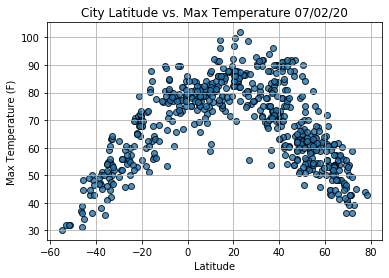

In [17]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

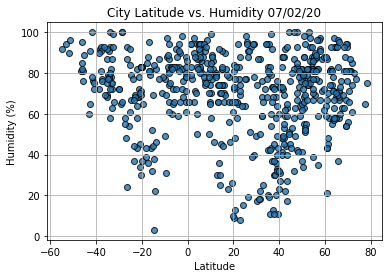

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

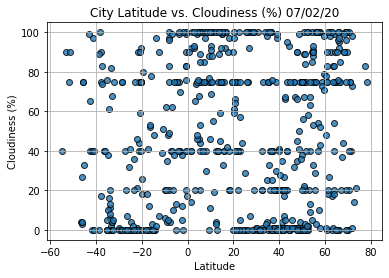

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

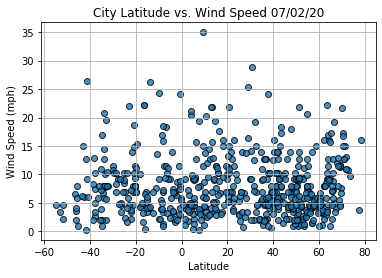

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ribeira Grande,PT,2020-07-02 21:01:49,38.52,-28.70,69.80,68,20,4.70
2,Qaanaaq,GL,2020-07-02 21:01:49,77.48,-69.36,43.95,65,83,3.80
3,Matara,LK,2020-07-02 21:01:50,5.95,80.54,78.91,86,100,9.13
5,Oktyabrskiy,RU,2020-07-02 21:01:17,54.48,53.47,56.10,88,90,2.91
6,Albany,US,2020-07-02 21:01:49,42.60,-73.97,91.00,59,66,5.50


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

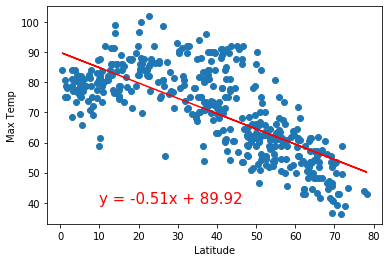

In [27]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()